In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('data/customer_booking.csv', encoding='latin-1')

In [17]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# General statistics

We see that about 15% of flights bookings are completed.

In [31]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


# Distribution comparisons

Visually it is hard to see significant differences in the distributions of the the numerical features between those where the booking was completed and those not. There are some worth noting:
*	Length of stay: Bookings for shorter trips tend to be more likely to be completed.
*	Flight duration: Bookings for the longest flights are less likely to be completed.
*	Extras: If extra baggage, preferred set, or in-flight meals are requested, then flights are slightly more likely to be booked.


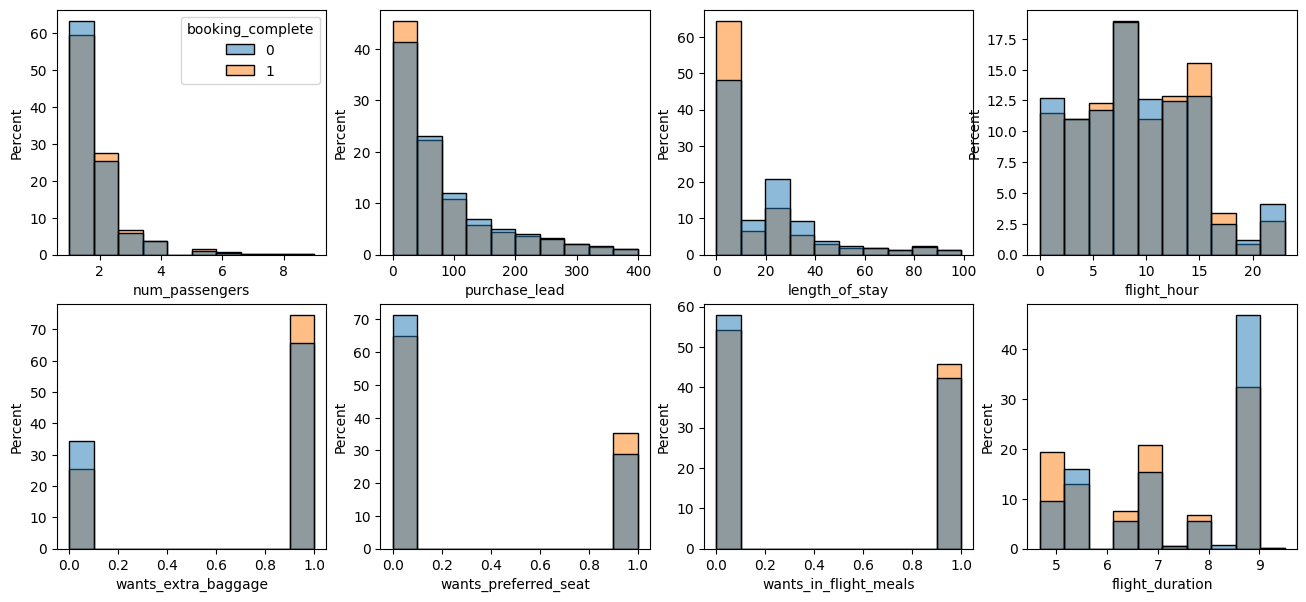

In [156]:
numerical_features = ['num_passengers', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration']

fig, ax = plt.subplots(2,4, figsize=(16,7))
for i,feature in enumerate(numerical_features):
    if feature == 'length_of_stay':
        df_temp = df[df['length_of_stay'] < 100][[feature,'booking_complete']]
    elif feature == 'purchase_lead':
        df_temp = df[df['purchase_lead'] < 400][[feature,'booking_complete']]
    else:
        df_temp = df[[feature,'booking_complete']]
    if i ==0:
        legend = True
    else:
        legend = False
    sns.histplot(
        df_temp,
        x=feature, 
        hue='booking_complete', 
        ax=ax[i//4, i%4], 
        stat='percent', 
        common_norm=False,
        bins=10, 
        multiple='layer',
        legend=legend
    )
    # ax[i//4, i%4].set_title(f'{feature}')
plt.show()

# Booking origin

The majority of bookings (completed or not) are from Australia, there there are many other locations with many bookings.

We see that, of the countries with a significant number of bookings, Malaysia has the highest completion rate.

In [70]:
booking_origins = pd.DataFrame(df['booking_origin'].value_counts())
booking_origins_completion = pd.DataFrame(df.groupby('booking_origin')['booking_complete'].mean())
booking_origins = pd.merge(
    left=booking_origins,
    right=booking_origins_completion,
    left_index=True,
    right_index=True
)
booking_origins = booking_origins.rename(columns={'booking_origin':'count', 'booking_complete':'completion_rate'})

C:\Users\andre\AppData\Local\Temp\ipykernel_23956\616778520.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(fig.get_xticklabels(), rotation=90)


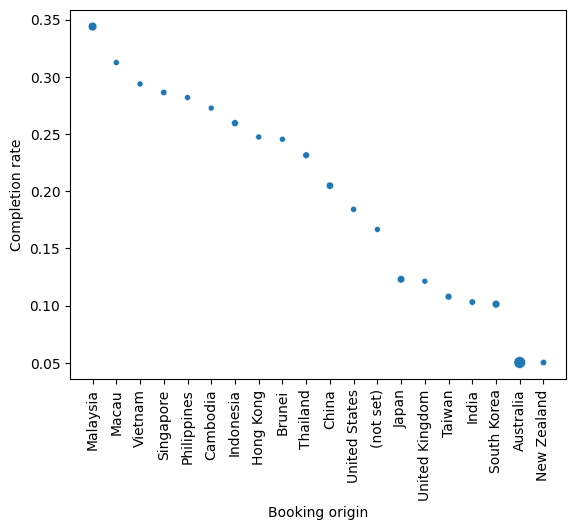

In [157]:
fig = sns.scatterplot(
    booking_origins.head(20).sort_values('completion_rate', ascending=False).reset_index(),
    x='index',
    y='completion_rate',
    size='count',
    legend=False
)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_xlabel('Booking origin')
fig.set_ylabel('Completion rate')
# fig.set_title('Completion rate by location of booking origin')
plt.show()

# Routes

We see that some routes are more frequent, and some have higher compeltion rates than others.

In [116]:
routes = df.groupby(['route'])['booking_complete'].agg(['count','mean'])
routes = routes.rename(columns={'mean':'completion_rate'})\
    .sort_values('count', ascending=False)
routes.head(10)

,count,completion_rate
route,,
AKLKUL,2680,0.211567
PENTPE,924,0.433983
MELSGN,842,0.051069
ICNSIN,801,0.112360
DMKKIX,744,0.251344
ICNSYD,695,0.007194
DMKPER,679,0.054492
DPSICN,666,0.085586
DMKOOL,655,0.061069


C:\Users\andre\AppData\Local\Temp\ipykernel_23956\2605653266.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


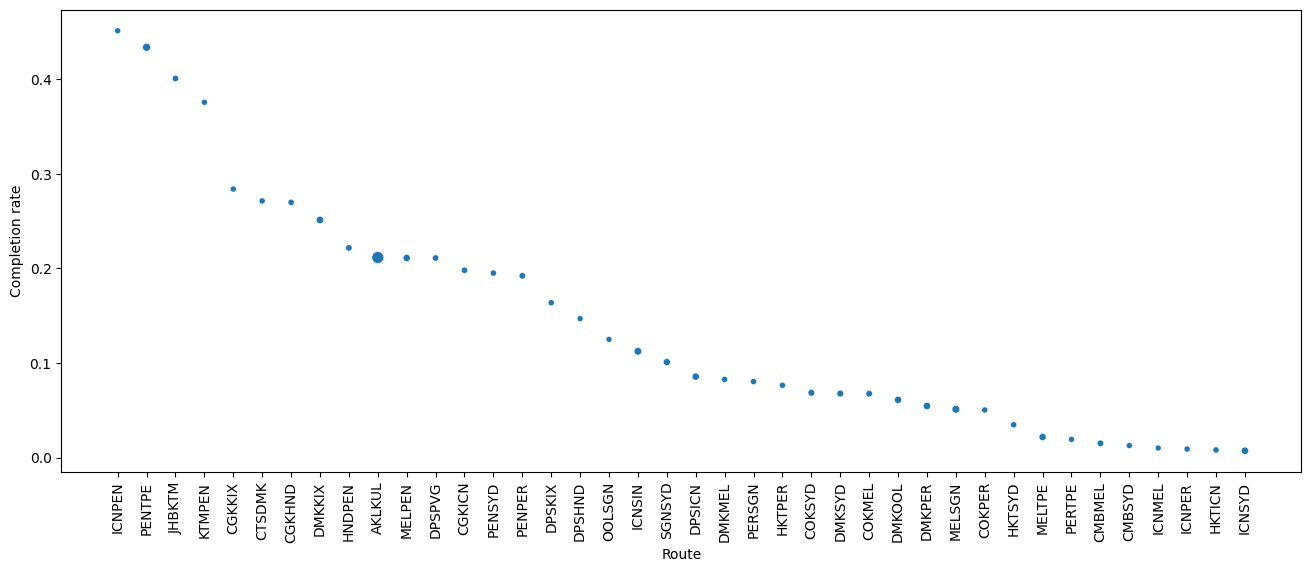

In [160]:
fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(
    routes.head(40).sort_values('completion_rate', ascending=False).reset_index(),
    x='route',
    y='completion_rate',
    size='count',
    legend=False,
    ax=ax
)
ax.set_xlabel('Route')
ax.set_ylabel('Completion rate')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## Route and booking origin - correlated?

In [172]:
origins = df[df['route']=='AKLDEL']['booking_origin'].value_counts()
origins.shape[0]
origins[2:]

United Kingdom    1
Name: booking_origin, dtype: int64

In [194]:
df[['route','booking_origin']]
extra_local_searches = {}
for route in df['route'].unique():
    origins = df[df['route']==route]['booking_origin'].value_counts()
    if origins.shape[0] > 2:
        # print(f'Route {route} has {origins.shape[0] - 2} extra origins,\
        #  with {origins.sum()} searches,\
        #      comprising {origins[2:].sum()*100/origins.sum():.1f}% of searches for this route.')
        extra_local_searches[route] = (origins[2:].sum() , origins[2:].sum()/origins.sum() , origins.index.to_list())
    else:
        extra_local_searches[route] = (0,0,origins.index.to_list())

In [197]:
extra_local_searches_df = pd.DataFrame(extra_local_searches).transpose()\
    .rename(columns={0:'Extra searches', 1:'Proportion of extra searches', 2:'Origins'})
extra_local_searches_df.sort_values('Proportion of extra searches', ascending=False).head(10)

,Extra searches,Proportion of extra searches,Origins
DPSKTM,13,0.541667,"[Nepal, Indonesia, Australia, United States, C..."
DPSIKA,2,0.5,"[Australia, Indonesia, United Kingdom, Malaysia]"
PEKRGN,2,0.5,"[United States, Japan, China, Myanmar (Burma)]"
DMKKTM,5,0.416667,"[Thailand, United States, Nepal, Norway, Japan..."
HKGMRU,2,0.4,"[Hong Kong, United States, Mauritius, China]"
DELPNH,5,0.357143,"[Cambodia, India, France, United States, Vietn..."
CKGPNH,1,0.333333,"[Taiwan, China, Cambodia]"
TRZXIY,2,0.333333,"[China, United Arab Emirates, India, (not set)]"
CTUMAA,2,0.333333,"[India, China, Taiwan, Vietnam]"
CMBMRU,1,0.333333,"[Sri Lanka, Hong Kong, Australia]"


In [203]:
print(f'{(extra_local_searches_df["Extra searches"].sum() *100 / df.shape[0]):.1f}% of searches are from outside route locals.')

5.5% of searchs are from outside route locals.


About 1 in 20 searches are made from a country outside of the route source/destination. 
One idea would be to label these as such, and then drop the `booking_origin`.

However, without mapping the routes to particular countries, identifying the extra booking origins is not possible in many cases (e.g. if a route was searched 3 times from 3 different places, we need extra info).

Since this only effects 5% of searches, the most time efficient method is to simply drop `booking_origin` and rely on the route info.

# Sales channel

There are two channels available: internet or mobile. Internet is about 8 or 9 times more popular, and has a 1.5 times higher completion rate.

In [119]:
df.groupby('sales_channel')['booking_complete'].agg(['count','mean'])

,count,mean
sales_channel,,
Internet,44382,0.154770
Mobile,5618,0.108402


# Trip type

The vast majority of trips are round trips. One way and circle tripes are vastly less popular, making up less than 1% of all searches recorded. Furthermore, the completion rate of these latter searches is about one third of that for round trips.

In [120]:
df.groupby('trip_type')['booking_complete'].agg(['count','mean'])

,count,mean
trip_type,,
CircleTrip,116,0.043103
OneWay,387,0.051680
RoundTrip,49497,0.150575


# Flight day

We see that the day of departure is not so important in determining completion rate. Wednesday has a slightly higher rate, and Sunday very slightly lower.

In [121]:
df.groupby('flight_day')['booking_complete'].agg(['count','mean'])

,count,mean
flight_day,,
Fri,6761,0.145393
Mon,8102,0.148605
Sat,5812,0.148142
Sun,6554,0.141440
Thu,7424,0.151131
Tue,7673,0.147139
Wed,7674,0.163148


# Conclusion

We can see that some of the categorical features are more important in determining the likelihood of bookings being completed. Certain countries of origin and more likely, along with certain routes (perhaps these two are correlated). Also, internet searches (as opposed to mobile) are more likely to be completed. Finally, since round trips are the vastly more popular search made, it makes sense to focus on these.

# Plan:

* Use booking origin: group together those with fewer than 100 (?) bookings.
* For routes, could do something similar. Could also study routes by airports involved and see if it correlates to booking origin.
* PCA: compare 2D viz for bookings completed and not.
* Use a tree-based model (?) to predict completion and get feature importances.